# Mnist PyTorch Classification

In [ ]:
import torch
import torchvision

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root='data', train=True,  transform = ToTensor(), download=True)
test_data  = datasets.MNIST(root='data', train=False, transform = ToTensor())

In [4]:
print(train_data)
print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [5]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [6]:
from torch.utils.data import DataLoader

batch_size = 100
trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=1)
testloader  = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=1)

In [7]:
import matplotlib.pyplot as plt

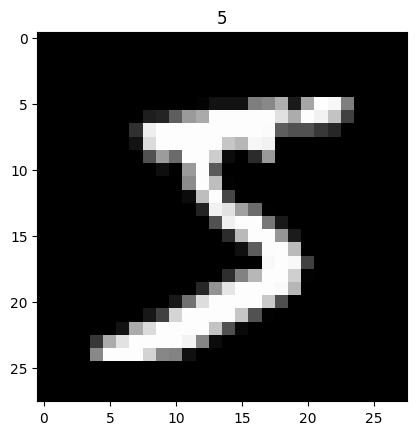

In [8]:
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

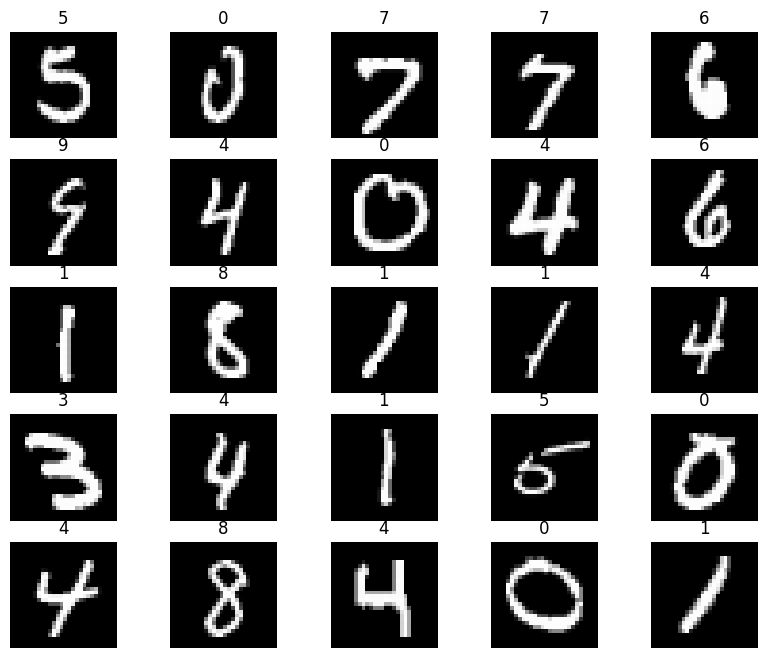

In [9]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [10]:
from torch import nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        #self.conv2_drop = nn.Dropout2d()
        self.fc = nn.Linear(32 * 7 * 7, 10) # output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x    # for visualization

In [11]:
net = CNN()
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

In [12]:
import tqdm

In [13]:
from tqdm.auto import tqdm

num_epochs = 10

net.train()
for epoch in range(num_epochs):
    for images, labels in tqdm(trainloader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        outputs = net(images)
        loss = loss_func(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pred_y = torch.max(outputs, 1)[1].data.squeeze()
        accuracy = (pred_y == labels).sum().item() / float(labels.size(0))

    print("Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.3f}".format(epoch+1, num_epochs, loss.item(), accuracy))

Epoch 1/10:   0%|          | 0/600 [00:00<?, ?it/s]

Epoch 1/10, Loss: 0.0946, Accuracy: 0.970


Epoch 2/10:   0%|          | 0/600 [00:00<?, ?it/s]

Epoch 2/10, Loss: 0.0390, Accuracy: 0.990


Epoch 3/10:   0%|          | 0/600 [00:00<?, ?it/s]

Epoch 3/10, Loss: 0.0146, Accuracy: 1.000


Epoch 4/10:   0%|          | 0/600 [00:00<?, ?it/s]

Epoch 4/10, Loss: 0.0207, Accuracy: 0.990


Epoch 5/10:   0%|          | 0/600 [00:00<?, ?it/s]

Epoch 5/10, Loss: 0.0024, Accuracy: 1.000


Epoch 6/10:   0%|          | 0/600 [00:00<?, ?it/s]

Epoch 6/10, Loss: 0.0076, Accuracy: 1.000


Epoch 7/10:   0%|          | 0/600 [00:00<?, ?it/s]

Epoch 7/10, Loss: 0.0061, Accuracy: 1.000


Epoch 8/10:   0%|          | 0/600 [00:00<?, ?it/s]

Epoch 8/10, Loss: 0.0017, Accuracy: 1.000


Epoch 9/10:   0%|          | 0/600 [00:00<?, ?it/s]

Epoch 9/10, Loss: 0.0046, Accuracy: 1.000


Epoch 10/10:   0%|          | 0/600 [00:00<?, ?it/s]

Epoch 10/10, Loss: 0.0032, Accuracy: 1.000


In [13]:
torch.save(net.state_dict(), 'mnist_cnn.pt')

In [14]:
net.eval()
with torch.no_grad():
    for images, labels in testloader:
        outputs = net(images)
        pred_y = torch.max(outputs, 1)[1].data.squeeze()
        accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    print('Test Accuracy of the model on the 10000 test images: %.3f' % accuracy)

Test Accuracy of the model on the 10000 test images: 1.000


In [15]:
sample = next(iter(testloader))
imgs, lbls = sample

In [16]:
# first 10 predictions
actual_y = lbls[:10].numpy()
print(actual_y)

[7 1 5 0 2 5 2 2 8 2]


In [17]:
test_output = net(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Predict: {pred_y}')
print(f'Actual : {actual_y}')

Predict: [7 1 5 0 2 5 2 2 8 2]
Actual : [7 1 5 0 2 5 2 2 8 2]
